In [9]:
"""
Python for Data Analysis 

Plotting and Visualization 
"""

%matplotlib notebook
# Financial Time Series 
import numpy as np 
import pandas as pd
from pylab import mpl, plt
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline
pd.set_option('display.max_rows', 2000)
pd.set_option('display.max_columns', 2000)
pd.set_option('display.width', 1000)

In [26]:
import numpy as np 

data = np.arange(10)

plt.plot(data)

# Figures and Subsplots

fig = plt.figure()

# You cant make a plot of a blank figure. You have yo create one or more subplots using add_subplot 

ax1 = fig.add_subplot(2, 2, 1)

ax2 = fig.add_subplot(2, 2, 2)

ax3 = fig.add_subplot(2, 2, 3)

plt.plot(np.random.rand(50).cumsum(), 'k--')

# When issue plotting command lile plt.plot([1.5, 3.5, -2, 1.6]), matplotlib draws on the last figure and subplot creation. 
# The 'k--' is a style option instructing matplotlib to plot a black dashed line.
# The objects returned by fig.add_subplot here are axessubplots objects, 
# one which you can directly plot on the other empty plots by calling their instance method

_ = ax1.hist(np.random.rand(100),
             bins=20, color = 'k',
            alpha=0.3)

ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

# Creating a figure with a grid of subplots is very common task, so matsplotlib includes a convenience method, plt.subplots
# that creates a new figure and returns a NumPy array containing the created subplots

fig , axes = plt.subplots(2, 2)

# Python subplot s options page 263

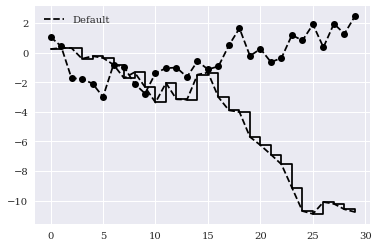

In [33]:
"""Colors, Markers, and Line Styles 

Matplotlib's main plot function accepts array of x y coordinates and optionally
a string abbreviation indication color and line style

ax.plot(x, y, 'g--')

This way of specifying color and line style in a string is provided as a convenience: in practice the same plot could also be 

ax.plot(x, y, linestyle='--', color='g')

Line plots can additionally have markers to highlight the actual data points

"""
from numpy.random import randn

plt.plot(randn(30).cumsum(), 'ko--')

# For line plots, you will notice that subsequent points are lineraly interpolated by default.
# This can be altered with the drawstyle option 

data = np.random.randn(30).cumsum()

plt.plot(data, 'k--', label='Default')

plt.plot(data, 'k-', drawstyle='steps-post')

plt.legend(loc ='best')

In [ ]:
"""
# Ticks,Labels,and Legends 

* Called with no argumetns returns the current parameter value(plt.xlim() returns the current 
    returns the current x-axis plotting range)
    
* Called with parameters setsd the parameter values plt. xlim([0, 10]), sets the x-axis range to 0 to 10

"""
-*


Genus,A,B,C,D
one,0.413992,0.157714,0.120604,0.961598
two,0.231309,0.333098,0.053417,0.726094
three,0.330529,0.686739,0.368963,0.803526
four,0.667915,0.279188,0.296096,0.888455
five,0.881082,0.304009,0.927800,0.899521
six,0.896097,0.306950,0.842554,0.272264


<AxesSubplot:>

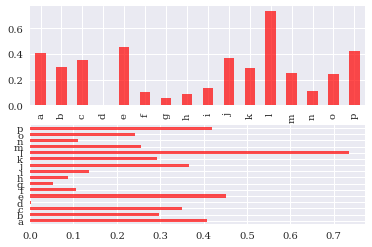

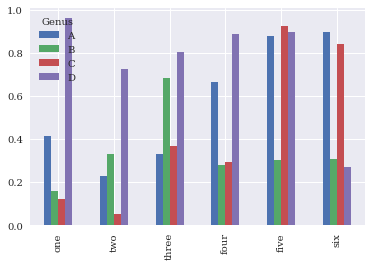

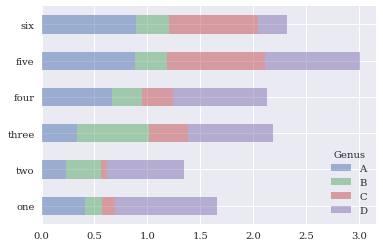

In [42]:
"""
Plotting with pandas and Seaborn 
Series plot method arguments /dataframe specific- plot arguments pages 277 

The plot.bar() and plot.barh() make vertical and horizontal bar plots, respectively. 
"""

fig, axes = plt.subplots(2,1)

data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))

data.plot.bar(ax=axes[0], color='r', alpha=0.7)

data.plot.barh(ax=axes[1], color='r', alpha=0.7)

# The options color='k' and alpha=0.7 set the color of the plots the black and use partial transparency on the filling.
# With a df, bar plots group the values in each corow together in a grop in bars, side by side, for each value

df = pd.DataFrame(np.random.rand(6,4), 
                 index=['one', 'two', 'three', 'four', 'five', 'six'],
                 columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))

display(df)

df.plot.bar()

# Create stacked bar plots from a df by passing stacked=True, resulting in the value in each row being stacked together 

df.plot.barh(stacked=True, alpha=0.5)

In [48]:
# A useful recipe for bar p;ots is to visualize a Series's values frequency using value_counts

s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))

display(s.value_counts().plot.bar())

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


size,2,3,4,5
day,,,,
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3
Thur,48,4,5,1


size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


<AxesSubplot:xlabel='day'>

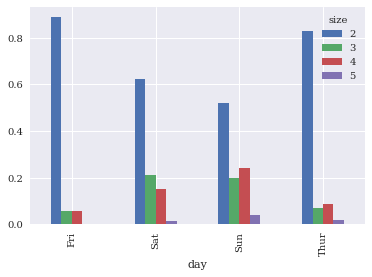

In [58]:
# dataset about resturant tipping, and suppose we wanted to make a stacked bar plot showing
# the percentage of data points of each party size on each day.
import pandas as pd  # import pandas library

csv_url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv'

## creata a DataFrame named df from reading in the csv file from a URL
df =  pd.read_csv(csv_url)  ## creata a DataFrame named df from reading in the csv file from a URL

df.head()

party_counts = pd.crosstab(df['day'], df['size'])

display(party_counts)

pp = party_counts.loc[:, 2:5]

display(pp)

# Then, normalize so that each row sums to 1 and make the plot

party_pcts = pp.div(pp.sum(1), axis=0)

display(party_pcts)

party_pcts.plot.bar()

<AxesSubplot:xlabel='tip_pct', ylabel='day'>

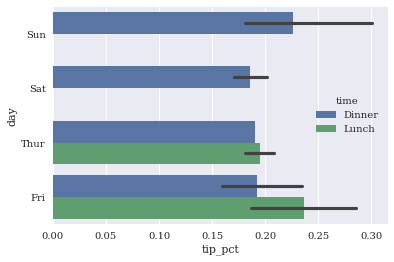

In [71]:
# Now We Rock With SeaBorn

import seaborn as sns

df['tip_pct'] = df['tip'] / (df['total_bill'] - df['tip'])

df.head()

#display(sns.barplot(x='tip_pct', y='day', data=df, orient='h'))

# Pltting functions in seaborn take a data argument, which can be a pandas df. The other args refer to column names.
# Because there are multiple observations for each value in the day, the bars are the average value of tip_pct.
# The black lines drawn on the bars represent 95% confidence interval

# seaborn.barplot has a hue option that enables us to split by an assitional categorical value

display(sns.barplot(x='tip_pct', y='day', hue = 'time', data=df, orient='h'))

# You can switch between different plot appearances using seaborn 

sns.set(style='whitegrid')

<AxesSubplot:ylabel='Frequency'>

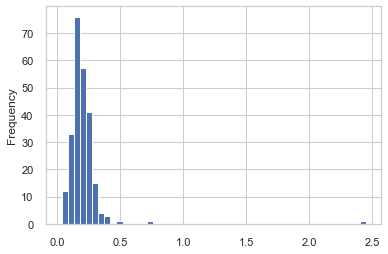

In [77]:
"""
# Histgrams and Density Plots 
A histgram is a kind of bar plot that gives a dicretized display of value frequency.
The data points are split into discrete, evenly spaced bins, and the number of data points in each bin is plotted
"""

display(df['tip_pct'].plot.hist(bins=50))

<AxesSubplot:ylabel='Density'>

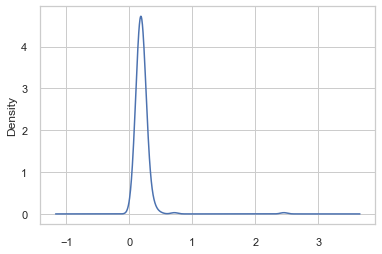

In [78]:
# The density plot computes an estimate of a continuous probability distribtion that might have generated the observed data

display(df['tip_pct'].plot.density())

C:\Users\JBarr\anaconda3\envs\dev\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

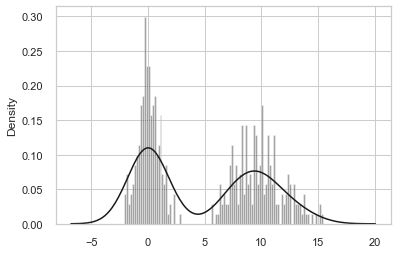

In [83]:
"""
Seaborn makes historgram and density plots even easier through its distplot method, whcih can plot both a hstogram 
and a continuos density estimate simultaneously.

EX: A bimodal distribution consisting of draws from two different standard normal distrubutions 
"""
comp1 = np.random.normal(0, 1, size=200)

comp2 = np.random.normal(10, 2, size=200)

values = pd.Series(np.concatenate([comp1, comp2]))

sns.distplot(values, bins=100, color='k')

C:\Users\JBarr\anaconda3\envs\dev\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='m1', ylabel='unemp'>

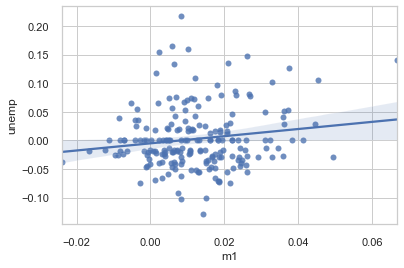

In [91]:
# Scatter or Point Plots 
# Point plots or scatter plots can be useful way of examining the realtionship between two one-dimensional data series.

macro = pd.read_csv('macrodata.csv')

data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]

trans_data = np.log(data).diff().dropna()

trans_data[-5:]

# We can then use  seaborn's regplot methos, whcih makes a scatter plot and fits a liner regression line

sns.regplot('m1', 'unemp', data=trans_data)

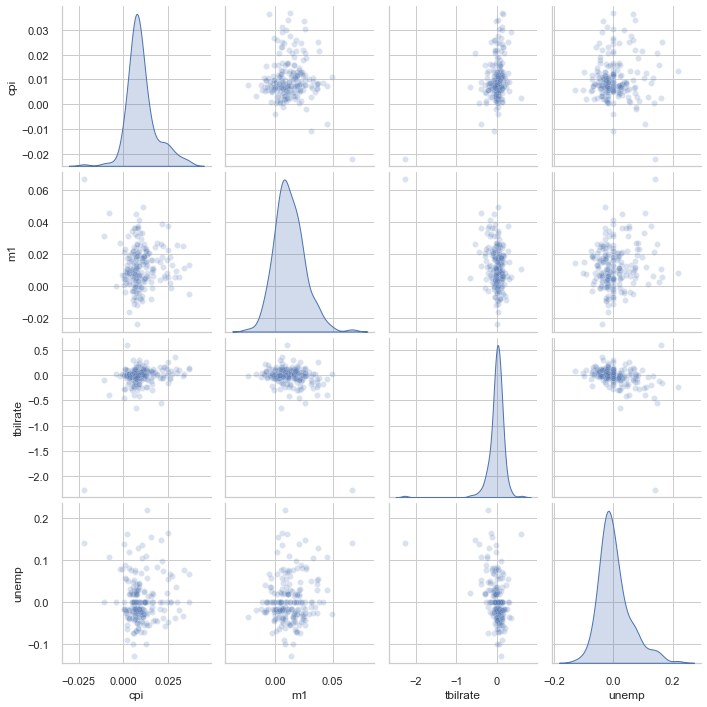

In [92]:
# In exploratory data analysys itls helpful to be able to look at all the scatter plots among a gropup of variables;

sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': 0.2})